# Creation of Qdrant vector database

#### Contributors:
- Victor Onuorah <onuorahvc@gmail.com>
- Yunmo Koo <yunmokoo7@gmail.com>
- Trung Nguyen

This notebook is worked on collaboratively by the contributors listed above.

When creating a vector dataset, the vector length is 512 for this notebook's OpenCLIP embedding function.

Apparel_dataset:
https://drive.google.com/drive/folders/17C-s4r774ons6z3CtCDsh8jH47p4_4PK?usp=sharing

Apparel_dataset_backup:
https://drive.google.com/drive/folders/13RcaFBXFwp7luImU771e9ONBwN1pEUlP?usp=sharing

### First section will create a image collection, second section will create a text collection.

1. Download apparel_products.csv

        In this notebook, "apparel_products_50k.csv" is used

2. Download apparel_images folder

        In this notebook, 50k apparel_image folder is used

#### Start of the first section.

In [9]:
import pandas as pd
df = pd.read_csv(r"<--path to apparel csv-->")

In [10]:
df

,asin,title,imgName,price,category_id,imgUrl,productURL
0,B00W66LQFO,Men's Eversoft Cotton Stay Tucked Crew T-Shirt,B00W66LQFO.jpg,18.48,110,https://m.media-amazon.com/images/I/513fraGQXW...,https://www.amazon.com/dp/B00W66LQFO
1,B0C4RMF5PZ,Official Renaissance World Tour Merch Disco Co...,B0C4RMF5PZ.jpg,40.00,110,https://m.media-amazon.com/images/I/71Uxhfi5KQ...,https://www.amazon.com/dp/B0C4RMF5PZ
2,B01ABVLOHA,Performance Lightweight Crew Training Socks (3...,B01ABVLOHA.jpg,17.90,110,https://m.media-amazon.com/images/I/71XHPuLiHV...,https://www.amazon.com/dp/B01ABVLOHA
3,B086KSDTQ4,"Men's Boxer Briefs, Soft and Breathable Cotton...",B086KSDTQ4.jpg,21.98,110,https://m.media-amazon.com/images/I/81ZBOce1Ww...,https://www.amazon.com/dp/B086KSDTQ4
4,B09LLW2Q4R,"Hooded Rain Poncho for Adult with Pocket, Wate...",B09LLW2Q4R.jpg,16.95,110,https://m.media-amazon.com/images/I/61nQuejTUG...,https://www.amazon.com/dp/B09LLW2Q4R
...,...,...,...,...,...,...,...
49995,B079Q4C2YC,"Women's On-The-go 600-Brilliancy Sport Sandal,...",B079Q4C2YC.jpg,42.53,122,https://m.media-amazon.com/images/I/81jOFKvd8P...,https://www.amazon.com/dp/B079Q4C2YC
49996,B0C2VJLF39,Black Heels for Women Strappy Closed Toe Platf...,B0C2VJLF39.jpg,39.99,122,https://m.media-amazon.com/images/I/61-l25ZXbH...,https://www.amazon.com/dp/B0C2VJLF39
49997,B0BNL1SZS3,Womens Open Toe Ankle Tie Back Low Block Chunk...,B0BNL1SZS3.jpg,49.98,122,https://m.media-amazon.com/images/I/61UJ6s+yvW...,https://www.amazon.com/dp/B0BNL1SZS3
49998,B07PZ8R8WF,Women's 'Original 108' Wool Clog with Cork Sol...,B07PZ8R8WF.jpg,145.00,122,https://m.media-amazon.com/images/I/61ahMep5JD...,https://www.amazon.com/dp/B07PZ8R8WF


In [8]:
# Dropping unrelated columns
columns_to_drop = ['category_id', 'productURL']

df.drop(columns=columns_to_drop, inplace=True)

In [4]:
df.iloc[0]["imgUrl"]

'https://m.media-amazon.com/images/I/513fraGQXWL._AC_UL320_.jpg'

In [6]:
from typing import Optional
import os
import numpy as np

def use_local_file(url: str) -> Optional[str]:
    try:
        basename = os.path.basename(url)
        # in example, f"C:\\Users\\...\\...\\apparel_images\\{basename}"
        local_path = f"<--path to apparel_images folder-->{basename}"

        # Check if the file exists locally
        if os.path.exists(local_path):
            return local_path
        else:
            print(f"File {local_path} does not exist locally.")
            return None
    except Exception as e:
        print(f"Error processing {url}: {e}")
        return None

# using "imgName" column in df, it locates local images and assigns it accordingly.
df["LocalImage"] = df["imgName"].apply(use_local_file).replace({None: np.nan})


In [7]:
df

,asin,title,imgName,price,imgUrl,LocalImage
0,B00W66LQFO,Men's Eversoft Cotton Stay Tucked Crew T-Shirt,B00W66LQFO.jpg,18.48,https://m.media-amazon.com/images/I/513fraGQXW...,C:\Users\MySummerPC\Desktop\apparel_images\B00...
1,B0C4RMF5PZ,Official Renaissance World Tour Merch Disco Co...,B0C4RMF5PZ.jpg,40.00,https://m.media-amazon.com/images/I/71Uxhfi5KQ...,C:\Users\MySummerPC\Desktop\apparel_images\B0C...
2,B01ABVLOHA,Performance Lightweight Crew Training Socks (3...,B01ABVLOHA.jpg,17.90,https://m.media-amazon.com/images/I/71XHPuLiHV...,C:\Users\MySummerPC\Desktop\apparel_images\B01...
3,B086KSDTQ4,"Men's Boxer Briefs, Soft and Breathable Cotton...",B086KSDTQ4.jpg,21.98,https://m.media-amazon.com/images/I/81ZBOce1Ww...,C:\Users\MySummerPC\Desktop\apparel_images\B08...
4,B09LLW2Q4R,"Hooded Rain Poncho for Adult with Pocket, Wate...",B09LLW2Q4R.jpg,16.95,https://m.media-amazon.com/images/I/61nQuejTUG...,C:\Users\MySummerPC\Desktop\apparel_images\B09...
...,...,...,...,...,...,...
49995,B079Q4C2YC,"Women's On-The-go 600-Brilliancy Sport Sandal,...",B079Q4C2YC.jpg,42.53,https://m.media-amazon.com/images/I/81jOFKvd8P...,C:\Users\MySummerPC\Desktop\apparel_images\B07...
49996,B0C2VJLF39,Black Heels for Women Strappy Closed Toe Platf...,B0C2VJLF39.jpg,39.99,https://m.media-amazon.com/images/I/61-l25ZXbH...,C:\Users\MySummerPC\Desktop\apparel_images\B0C...
49997,B0BNL1SZS3,Womens Open Toe Ankle Tie Back Low Block Chunk...,B0BNL1SZS3.jpg,49.98,https://m.media-amazon.com/images/I/61UJ6s+yvW...,C:\Users\MySummerPC\Desktop\apparel_images\B0B...
49998,B07PZ8R8WF,Women's 'Original 108' Wool Clog with Cork Sol...,B07PZ8R8WF.jpg,145.00,https://m.media-amazon.com/images/I/61ahMep5JD...,C:\Users\MySummerPC\Desktop\apparel_images\B07...


In [8]:
from sentence_transformers import SentenceTransformer
from PIL import Image

model = SentenceTransformer("clip-ViT-B-32")

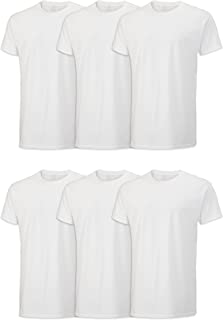

In [9]:
image = Image.open(df.iloc[0]["LocalImage"])
image

In [10]:
image_embedding = model.encode(image)
# shape of the embedding will return the vector length.
image_embedding.shape

(512,)

### Below, the 50k products are segmented into chunks of 5k products to prevent heavy loads.

In [10]:
df_subset1 = df.iloc[:5000]

In [54]:
df_subset2 = df.iloc[5000:10000]

In [55]:
df_subset3 = df.iloc[10000:15000]

In [56]:
df_subset4 = df.iloc[15000:20000]

In [57]:
df_subset5 = df.iloc[20000:25000]

In [74]:
df_subset6 = df.iloc[25000:30000]

In [75]:
df_subset7 = df.iloc[30000:35000]

In [76]:
df_subset8 = df.iloc[35000:40000]

In [77]:
df_subset9 = df.iloc[40000:45000]

In [78]:
df_subset10 = df.iloc[45000:50000]

#### Embedding the images

In [11]:
def calculate_df(df):
    df.loc[:, "Embedding"] = df["LocalImage"].map(calculate_embedding)
    df.loc[:, "Embedding"] = df["Embedding"].replace({None: np.nan})
    df = df.dropna(subset=["Embedding"])
    
    return df

In [ ]:
df_subset1 = calculate_df(df_subset1)

In [ ]:
df_subset2 = calculate_df(df_subset2)

In [ ]:
df_subset3 = calculate_df(df_subset3)

In [ ]:
df_subset4 = calculate_df(df_subset4)

In [ ]:
df_subset5 = calculate_df(df_subset5)

In [ ]:
df_subset6 = calculate_df(df_subset6)

In [ ]:
df_subset7 = calculate_df(df_subset7)

In [ ]:
df_subset8 = calculate_df(df_subset8)

In [ ]:
df_subset9 = calculate_df(df_subset9)

In [ ]:
df_subset10 = calculate_df(df_subset10)

#### Creation of image collection

In [14]:
from qdrant_client import QdrantClient
from qdrant_client.http import models as rest
from qdrant_client.models import VectorParams, Distance

# The url for the Qdrant cluster is wrong if it starts like "https://node..."
qdrant_client = QdrantClient(
     url="<--url-->", 
    api_key="<--api_key-->",
)

In [ ]:
# name the collection
collection_name = "<--name of colleciton-->"
vectors_config = rest.VectorParams(size=512, distance=rest.Distance.COSINE)

# Here, we use ".recreate_collection" which overrwites existing collection with same same. Caution when executing.
# Use ".create_collection" instead to avoid overrwiting.
try:
    qdrant_client.recreate_collection(
        collection_name=collection_name,
        vectors_config=vectors_config,
    )
    print(f"Collection '{collection_name}' created successfully.")
except Exception as e:
    print(f"Error creating collection: {e}")

#### Payload creation

        Payload is for specifying what information will be included on a datapoint.

In [44]:
def img_payload(df):
    payloads = df[["asin", "title", "price", "imgUrl"]] \
        .fillna("Unknown") \
        .rename(columns={"id": "ID", 
                         "product title": "Decription", 
                         "price": "Price"}) \
        .to_dict("records")
    return payloads

In [45]:
import uuid

def upload_coll(df, payloads):
    df.reset_index(drop=True, inplace=True)
    
    qdrant_client.upload_collection(
        collection_name="<--name of colleciton-->",
        vectors=list(map(list, df["Embedding"].tolist())),
        payload=payloads,
        ids=[uuid.uuid4().hex for _ in payloads],
    )

In [ ]:
# Make sure to change the df_subset number accordingly.
# If the dataset was separated like given example, the df_subset would be 1-10.

pay = img_payload(df_subset1)

upload_coll(df_subset1, pay)

In [ ]:
# Run this cell to confirm how many products are in the collection.
qdrant_client.count("<--name of colleciton-->")

#### End of the first section.

### The second section will create a text collection.

        Procedure is similar to the image collection.

In [ ]:
import pandas as pd
df = pd.read_csv(r"<--path to apparel csv-->")

In [ ]:
df

In [ ]:
# Dropping unrelated columns
columns_to_drop = ['category_id', 'productURL', 'imgUrl', 'productURL', 'imgName']

df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
from sentence_transformers import SentenceTransformer
from PIL import Image

model = SentenceTransformer("clip-ViT-B-32")

In [ ]:
txt = df.iloc[0]["title"]
txt

In [ ]:
txt_embed = model.encode(txt)
txt_embed.shape

#### Below, the dataset is segmented. Same purpose as the image collection, it prevents heavy loads.

In [ ]:
df_subset1 = df.iloc[:10000]

In [ ]:
df_subset2 = df.iloc[10000:20000]

In [ ]:
df_subset3 = df.iloc[20000:30000]

In [ ]:
df_subset4 = df.iloc[30000:40000]

In [ ]:
df_subset5 = df.iloc[40000:50000]

#### Embedding the texts

In [ ]:
from typing import Optional, List
import numpy as np

def calculate_text_embedding(text: str) -> Optional[List[float]]:
    try:
        return model.encode(text).tolist()
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [ ]:
def calculate_df(df):
    # Apply calculate_text_embedding to each element of the 'title' column
    df["Embedding"] = df["title"].apply(calculate_text_embedding)
    
    # Drop rows with missing embeddings
    df.dropna(subset=["Embedding"], inplace=True)
    
    return df

In [ ]:
df_subset1 = calculate_df(df_subset1)

In [ ]:
df_subset2 = calculate_df(df_subset2)

In [ ]:
df_subset3 = calculate_df(df_subset3)

In [ ]:
df_subset4 = calculate_df(df_subset4)

In [ ]:
df_subset5 = calculate_df(df_subset5)

#### Cleaning up embedded texts with errors.

In [ ]:
import numpy as np

def filter_embeddings(df):
    # Remove rows with empty embeddings
    df = df.dropna(subset=["Embedding"])
    
    # Remove rows with non-(512,) embeddings
    df = df[df['Embedding'].apply(lambda x: isinstance(x, list) and np.array(x).shape == (512,))]
    
    return df

In [ ]:
# Make sure to change the df_subset number accordingly.
# If the dataset was separated like given example, the df_subset would be 1-5.
df_subset1 = filter_embeddings(df_subset1)

#### Creation of text collection

In [ ]:
from qdrant_client import QdrantClient
from qdrant_client.http import models as rest
from qdrant_client.models import VectorParams, Distance

# The url for the Qdrant cluster is wrong if it starts like "https://node..."
qdrant_client = QdrantClient(
     url="<--URL-->", 
    api_key="<--API_KEY-->",
)

In [ ]:
collection_name = "<--name of colleciton-->"
vectors_config = rest.VectorParams(size=512, distance=rest.Distance.COSINE)

# Here, we use ".recreate_collection" which overrwites existing collection with same same. Caution when executing.
# Use ".create_collection" instead to avoid overrwiting.
try:
    qdrant_client.recreate_collection(
        collection_name=collection_name,
        vectors_config=vectors_config,
    )
    print(f"Collection '{collection_name}' created successfully.")
except Exception as e:
    print(f"Error creating collection: {e}")


In [ ]:
def img_payload(df):
    payloads = df[["asin", "title", "price"]] \
        .fillna("Unknown") \
        .rename(columns={"id": "ID", 
                         "product title": "Decription", 
                         "price": "Price"}) \
        .to_dict("records")
    return payloads

In [ ]:
import uuid 
def upload_coll(df, payloads):
    df.reset_index(drop=True, inplace=True)
    
    qdrant_client.upload_collection(
        collection_name="<--name of colleciton-->",
        vectors=list(map(list, df["Embedding"].tolist())),
        payload=payloads,
        ids=[uuid.uuid4().hex for _ in payloads],
    )

In [ ]:
# Make sure to change the df_subset number accordingly.
# If the dataset was separated like given example, the df_subset would be 1-5.
pay = img_payload(df_subset1)
upload_coll(df_subset1, pay)

In [ ]:
# Run this cell to confirm how many products are in the collection.
qdrant_client.count("<--name of colleciton-->")